# MNIST Handwritten Digits Classification Using CNN

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

%matplotlib inline

print(f"NP version: {np.__version__}")
print(f"PD version: {pd.__version__}")
print(f"TF version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

NP version: 1.21.6
PD version: 1.3.5
TF version: 2.11.0
Keras version: 2.11.0


## Load Data

In [22]:
# MNIST handwritten digits dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
# Visualize single sample
def plot_sample(X, y, index):
  """
  Plots an image for given index.
  """
  plt.figure(figsize=(10, 5))
  plt.imshow(X[index], cmap='gray')
  plt.title(f"Label: {y[index]}")
  plt.axis('off')

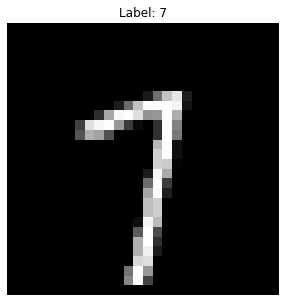

In [25]:
plot_sample(X_train, y_train, 42)

In [26]:
# Plot multiple samples
def plot_16_images(X, y):
  """
  Plots 16 sample images.
  """
  plt.figure(figsize=(10, 10))

  for i in range(16):
    # subplots
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

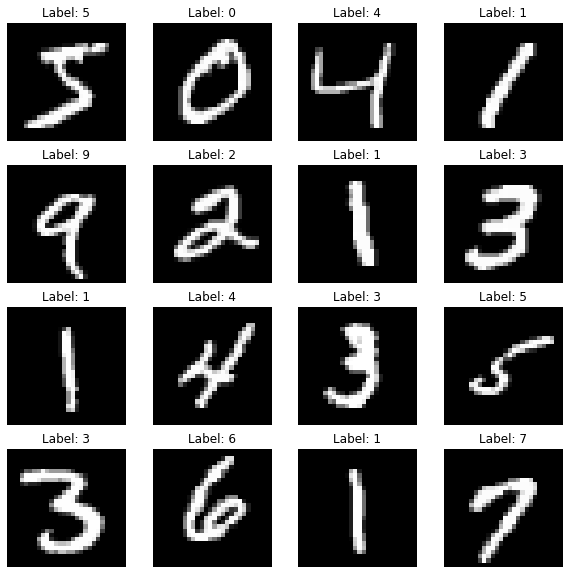

In [27]:
plot_16_images(X_train, y_train)

In [28]:
X_train = np.reshape(X_train,(-1,28,28,1))
X_test = np.reshape(X_test,(-1,28,28,1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [29]:
# Feature Scaling
X_train = X_train/255
X_test = X_test/255

In [30]:
# One hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Model Building

In [31]:
# Build model
model = keras.Sequential()

### FEATURE LEARNING
# Convolution layer #1
model.add(Conv2D(
    filters=32, 
    kernel_size=5,
    strides=1,
    padding="Same",
    activation="relu",
    input_shape=(28,28,1))
)
model.add(MaxPooling2D(padding="same"))

# Convolution layer #2
model.add(Conv2D(
    filters=64, 
    kernel_size=5,
    strides=1,
    padding="same",
    activation="relu"))
model.add(MaxPooling2D(padding="same"))

### CLASSIFICATION
# Flatten layer
model.add(Flatten())
# Fully connected layer
model.add(Dense(1024,activation="relu"))
# Output layer
model.add(Dense(10, activation="sigmoid"))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [33]:
# Compile model
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [34]:
# Fit model
history = model.fit(X_train, 
                    y_train,
                    batch_size=64,
                    epochs=5,
                    validation_data=(X_test,y_test))

Epoch 1/5
938/938 [==============================] - 8s 7ms/step - loss: 0.1098 - accuracy: 0.9661 - val_loss: 0.0318 - val_accuracy: 0.9889
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0349 - val_accuracy: 0.9892
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0246 - accuracy: 0.9917 - val_loss: 0.0272 - val_accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0257 - val_accuracy: 0.9913
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0256 - val_accuracy: 0.9921


In [35]:
# Evaluate model
model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0256 - accuracy: 0.9921


([0.00827070139348507, 0.9973333477973938],
 [0.025633690878748894, 0.9921000003814697])